In [2]:
# Import required libraries

import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt # we need this to plot results and thereby compare models
from matplotlib import style

In [3]:
# Read the student performance data

data = pd.read_csv("student-mat.csv", sep=";") # note that the data is separated by semicolons

In [4]:
# Print the entries for the first 5 students

print(data.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


### It is informative to plot the data to see which features are the best to use, i.e., to make out any correlations between a given feature's value and the final grade of the student

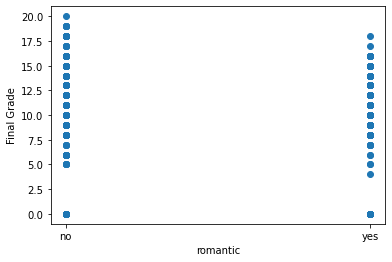

In [5]:
# Plot a scatter plot for the chosen feature
plot = "romantic" # Change this to the feature of choice
plt.scatter(data[plot], data["G3"]) 
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()

The data contains 33 different features for each entry and most of them are likely not beneficial to the task of predicting student grades. Hence, we trim the data to only include relevant features:
 - studytime: weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
 - failures: number of past class failures (numeric: n if 1<=n<3, else 4)
 - paid: extra paid classes within the course subject (Math in this case) (binary: yes or no)
 -  absences: number of school absences (numeric: from 0 to 93)
 - G1: first period grade (numeric: from 0 to 20) 
 - G2: second period grade (numeric: from 0 to 20) 
 - G3: final grade (numeric: from 0 to 20, output target)
 - Dalc: Daily alcohol consumption (numeric: from 1 - very low to 5 - very high)
 - romantic: with a romantic relationship (binary: yes or no) 

In [6]:
# Trim our dataset so it only contains the features above
chosen_features = ["G1", "G2", "G3", "studytime", "failures", "paid", "romantic"]
num_features = len(chosen_features) - 1
data = data[chosen_features]
data.head()

,G1,G2,G3,studytime,failures,paid,romantic
0,5,6,6,2,0,no,no
1,5,5,6,2,0,no,no
2,7,8,10,2,3,yes,no
3,15,14,15,3,0,yes,yes
4,6,10,10,2,0,yes,no


In [7]:
# Note that the entries in some columns are either no or yes. The used linear model requires
# features to be numbers. Hence, we transform these entries as follows
# no  -> 0
# yes -> 1

data = data.replace(to_replace=['no', 'yes'], value=[0, 1])
data.head()

,G1,G2,G3,studytime,failures,paid,romantic
0,5,6,6,2,0,0,0
1,5,5,6,2,0,0,0
2,7,8,10,2,3,1,0
3,15,14,15,3,0,1,1
4,6,10,10,2,0,1,0


In [8]:
# We will be trying to predict the final grade of each student based on their other attributes
# Define the label for the task:
predict = "G3"

# Create arrays of our features and our labels:

X = np.array(data.drop(labels = [predict], axis = 1)) # Features
y = np.array(data[predict]) # Labels

In [9]:
# Next, we split our data into training (90%) and testing (10%) datasets:

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X,
                                                                            y,
                                                                            test_size = 0.1)

We will be fitting a linear model to the training data. This means that we will try to fit a function of the form $y = m_0 + m_1x_1 + m_2x_2 + m_3x_3 + \dots$, i.e., a linear function in the chosen parameters. Our model will do so by minimising the squared differences between the predicted values for our label for each student, and their true value.

In [10]:
# We import the linear model from the scikit-learn package

linear = linear_model.LinearRegression()

In [13]:
# We fit the model to our training data
linear.fit(x_train, y_train)

# and we calculate its accuracy on the testing data
acc = linear.score(x_test, y_test) # acc stands for accuracy
print('{:.2f}%'.format(acc*100))

75.74%


In [14]:
# It is informative to view the fitted coefficients of our model
print('m_0 = ' +  str(linear.intercept_))
for index, coefficient in enumerate(linear.coef_):
    print('m_' + str(index + 1) + ' = ' + str(coefficient))

m_0 = -1.1521641691241946
m_1 = 0.18166021754195927
m_2 = 0.946558468286936
m_3 = -0.22377869913401854
m_4 = -0.18320119000025317
m_5 = 0.13861065224444497
m_6 = -0.30654725109951614


For reference, the order of the features is: [G1, G2, studytime, failure, absences, paid, Dalc, romantic]

We now compare the predictions (rounded to two decimal places) of our model to the actual final grades for the students in the training data.

In [15]:
predictions = linear.predict(x_test) # Gets a list of all predictions

for x in range(len(predictions)):
    print('{:.2f}'.format(predictions[x]), x_test[x], y_test[x])

10.63 [10 11  2  0  0  0] 11
15.56 [16 15  1  0  1  1] 16
4.04 [5 5 2 0 0 0] 6
7.12 [9 8 2 1 0 1] 0
12.54 [13 13  3  0  0  1] 14
10.18 [10 11  4  0  0  0] 11
13.07 [13 13  2  0  0  0] 12
7.66 [7 9 2 2 1 1] 8
10.64 [13 11  3  0  0  1] 11
10.81 [11 11  2  0  0  0] 11
16.45 [16 16  2  0  0  0] 16
8.33 [9 9 2 2 1 0] 9
9.78 [11 10  3  0  1  0] 11
5.49 [7 6 2 0 1 0] 6
17.72 [17 17  2  0  1  0] 17
11.91 [10 13  4  0  1  1] 13
10.95 [11 11  2  0  1  0] 11
9.68 [10 10  2  0  0  0] 10
10.59 [ 9 11  2  0  1  0] 12
6.11 [7 7 2 1 0 0] 7
12.88 [10 13  1  0  1  0] 13
8.87 [10  9  2  0  1  0] 9
6.66 [7 7 1 0 1 0] 8
8.87 [10  9  2  0  1  0] 0
9.82 [10 10  2  0  1  0] 11
14.42 [14 14  1  0  0  0] 14
8.25 [8 9 1 1 1 1] 8
9.82 [11 10  2  1  1  0] 10
4.04 [5 5 2 0 0 0] 5
15.28 [16 15  3  0  0  0] 15
14.25 [16 14  4  0  1  0] 15
5.62 [7 7 2 2 0 1] 9
10.46 [13 11  3  1  0  1] 11
7.16 [9 8 4 0 0 0] 8
4.00 [7 5 3 1 0 0] 0
6.31 [8 7 2 0 1 1] 8
14.84 [14 15  2  0  0  1] 15
3.59 [6 5 1 3 0 1] 0
16.05 [15 16  3  0

### We will now create multiple models for solving the task above, compare them, and save those which yield the best results.

In [16]:
import pickle # we need this to save our models

In [17]:
# Save the model we created above to a .pickle file. Note that we are opening the file in 
# binary mode.

with open("model_w_" + str(num_features) + "_features.pickle", "wb") as f:
    pickle.dump(linear, f)

In [18]:
# We can now load our model from the pickle file

pickle_in = open("model_w_" + str(num_features) + "_features.pickle", "rb")
linear = pickle.load(pickle_in)

Our models vary in accuracy since the training and testing data is chosen randomly. Hence, it is worth to train multiple models and pick the best one.

In [19]:
# We train multiple models, each time splitting the whole dataset into training and testing
# data differently (in general).

best_accuracy = 0
best_model = None
for model_number in range(60):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X,
                                                                                y,
                                                                                test_size=0.1)

    linear = linear_model.LinearRegression()

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    print("Accuracy for model " + str(model_number + 1) + ": " +
          str('{:.2f}%'.format(acc*100)))
    
    # If the current model has a better score than one we've already trained then save it
    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model_number
        with open("model_w_" + str(num_features) + "_features.pickle", "wb") as f:
            pickle.dump(linear, f)
            
print('\nThe model saved is number ' + str(best_model) +
      ' with an accuracy of ' + str('{:.2f}%'.format(best_accuracy*100)))

Accuracy for model 1: 89.51%
Accuracy for model 2: 83.70%
Accuracy for model 3: 88.73%
Accuracy for model 4: 87.09%
Accuracy for model 5: 87.46%
Accuracy for model 6: 84.10%
Accuracy for model 7: 82.32%
Accuracy for model 8: 91.05%
Accuracy for model 9: 85.84%
Accuracy for model 10: 74.24%
Accuracy for model 11: 83.58%
Accuracy for model 12: 81.50%
Accuracy for model 13: 91.10%
Accuracy for model 14: 86.15%
Accuracy for model 15: 77.83%
Accuracy for model 16: 85.30%
Accuracy for model 17: 69.72%
Accuracy for model 18: 79.23%
Accuracy for model 19: 80.68%
Accuracy for model 20: 74.57%
Accuracy for model 21: 71.68%
Accuracy for model 22: 84.38%
Accuracy for model 23: 90.48%
Accuracy for model 24: 85.66%
Accuracy for model 25: 61.98%
Accuracy for model 26: 78.61%
Accuracy for model 27: 73.88%
Accuracy for model 28: 74.46%
Accuracy for model 29: 70.14%
Accuracy for model 30: 81.56%
Accuracy for model 31: 82.25%
Accuracy for model 32: 76.58%
Accuracy for model 33: 87.91%
Accuracy for model 